prioooooooooor
[0 0]
(2,)
X:
[[-1.31313131  1.        ]]
Y:
[[ 2.20707071]]
cov
[[ 0.42984957  0.43419148]
 [ 0.43419148  0.66934649]]
(2, 2)
(2,)
HERE posterior_cov
[[ 0.42984957  0.43419148]
 [ 0.43419148  0.66934649]]
np.dot(X.T, Y)
[[-2.89817366]
 [ 2.20707071]]
np.dot(prior_per, prior_mean)
[ 0.  0.]
HERE posterior_mean
[[-0.9582913  -0.9582913 ]
 [ 0.72977568  0.72977568]]
mean
[-0.9582913   0.72977568]
X:
[[-1.31313131  1.        ]
 [-0.82828283  1.        ]]
Y:
[[ 2.20707071]
 [ 1.57676768]]
cov
[[ 0.36659061  0.38375877]
 [ 0.38375877  0.49264003]]
(2, 2)
(2,)
HERE posterior_cov
[[ 0.36659061  0.38375877]
 [ 0.38375877  0.49264003]]
np.dot(X.T, Y)
[[-4.20418325]
 [ 3.78383838]]
np.dot(prior_per, prior_mean)
[-9.66057885  7.35690236]
HERE posterior_mean
[[-7.54591922  5.22313728]
 [-7.63092613  7.28317402]]
mean
[ 5.22313728  7.28317402]
X:
[[-1.31313131  1.        ]
 [-0.82828283  1.        ]
 [ 0.46464646  1.        ]]
Y:
[[ 2.20707071]
 [ 1.57676768]
 [-0.1040404 ]]
cov
[[ 0

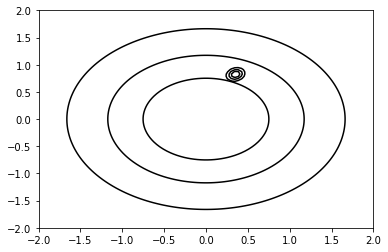

In [791]:
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import numpy.random
from numpy.linalg import inv

#global variables
random_xs = []
y_values = []
w = [-1.3, 0.5]

#Define prior assumptions
identity_matrix = np.identity(2)
prior_w_mean = np.array([0,0])
prior_w_cov = identity_matrix
prior_w = multivariate_normal(prior_w_mean.flatten(), prior_w_cov)

#Plot contour
x = np.linspace(-2, 2, 100)
x1p, x2p = np.meshgrid(x,x)
x1p_flat = x1p.flatten()
x2p_flat = x2p.flatten()
pos = np.vstack((x1p_flat, x2p_flat))
pos = pos.T
Z = prior_w.pdf(pos)
Z = Z.reshape(100,100)
fig = plt.figure()
ax = fig.add_subplot(111)
prior_w_contour = ax.contour(x1p, x2p, Z, 3, colors='k')

#Generate x and y values
def get_random_xs(n):
    for i in range(0, n):
        index = np.random.randint(0, len(x)-1)
        while x[index] in random_xs:
            index = np.random.randint(1, len(x)-1)
        random_x = x[index]
        random_xs.append(random_x)
    return random_xs

def generate_y_value(random_xs, i):
    for j, value in enumerate(random_xs):
        if i == j:
            y = value*w[0] + w[1]
            y_values.append(y)
    Y = np.array([y_values])
    Y = Y.T
    return Y

#Turn random_xs into matrix with ones
def generate_x_and_ones_matrix(random_xs):
    arr_x = np.array([random_xs])
    arr_x = arr_x.T
    ones = np.array([np.ones(len(random_xs))])
    ones = ones.T
    x_and_ones = np.concatenate((arr_x, ones), axis=1)
    return x_and_ones
  
def posterior_covariance(X, prior_cov):
    posterior_per = (1/(0.3))*np.dot(X.T, X) + inv(prior_cov)
    posterior_cov = inv(posterior_per)
    return posterior_cov

def generate_posterior_mean(X, Y, posterior_cov, prior_per, prior_mean):
    posterior_mean = np.dot(posterior_cov, ((1/0.3)*np.dot(X.T, Y) + np.dot(prior_per, prior_mean)))
    print(prior_per.shape)
    print(prior_mean.shape)
    print("HERE posterior_cov")
    print(posterior_cov)
    print("np.dot(X.T, Y)")
    print(np.dot(X.T, Y))
    print("np.dot(prior_per, prior_mean)")
    print(np.dot(prior_per, prior_mean))
    print("HERE posterior_mean")
    print(posterior_mean)
    posterior_mean_new = posterior_mean[:,1]
    #posterior_mean = (1/(0.3))*np.dot(posterior_cov, np.dot(X.T, Y))
    return posterior_mean_new
    
def posterior(posterior_mean, posterior_cov):
    posterior_w = multivariate_normal(posterior_mean.flatten(), posterior_cov)
    return posterior_w
    
def generate_posterior(n):
    prior_cov = np.identity(2)
    prior_per = inv(prior_cov)
    prior_mean = prior_w_mean
    print("prioooooooooor")
    print(prior_mean)
    print(prior_mean.shape)
    for i in range(0, n):
        xs = get_random_xs(1)
        X = generate_x_and_ones_matrix(xs)
        print("X:")
        print(X)
        Y = generate_y_value(xs, i)
        print("Y:")
        print(Y)
        posterior_cov = posterior_covariance(X, prior_cov)
        print("cov")
        print(posterior_cov)
        posterior_mean = generate_posterior_mean(X, Y, posterior_cov, prior_per, prior_mean)
        print("mean")
        print(posterior_mean)
        posterior_w = posterior(posterior_mean, posterior_cov)
        prior_cov = posterior_cov
        prior_per = inv(prior_cov)
        prior_mean = posterior_mean
    return posterior_w

posterior_w = generate_posterior(10)
#Generate an x and turn into (1,2) matrix  
#xs = get_random_xs(10)
#X = generate_x_and_ones_matrix(xs)§
#print("X:")
#print(X)
#Y = generate_y_value(xs)
#print("Y:")
#print(Y)
#posterior_cov = posterior_covariance(X, prior_w_cov)
#posterior_mean = posterior_mean(X, Y, posterior_cov)
#posterior_w = posterior(posterior_mean, posterior_cov)

#Calculate posterior (formulas from GaussianIDentities.pdf end of page 4)
#posterior_cov = (1/(0.3))*np.dot(X.T, X) + inv(identity_matrix)  #0.3 or 0.3**2?
#posterior_mean = (1/(0.3))*np.dot(inv(posterior_cov), np.dot(X.T, Y))
#print("cov")
#print(posterior_cov)
#print("mean")
#print(posterior_mean)
#posterior_w = multivariate_normal(posterior_mean.flatten(), inv(posterior_cov))

#Plot contour for posterior of w given datapoints
Z_posterior = posterior_w.pdf(pos)
Z_posterior = Z_posterior.reshape(100,100)
posterior_w_contour = ax.contour(x1p, x2p, Z_posterior, 3, colors='k')

plt.axis([-2, 2, -2, 2])
plt.show()